<a href="https://colab.research.google.com/github/SoujanyaMirajkar/Alzheimer-s-Disease/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Use the python parser to read the CSV file
data = pd.read_csv(r'/content/Alzheimer_Disease_notnull1.csv', engine='python')

# Print the data
data

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,1,2021,2021,WEST,West,4,Arthritis among older adults,Percentage of older adults ever told they have...,28.800000,34.400000,1.0,31.600000,0.0,0.0,2.0,NaN
1,2,2017,2017,NRE,Northeast,4,Arthritis among older adults,Percentage of older adults ever told they have...,49.100000,51.600000,1.0,50.300000,1.0,0.0,5.0,NaN
2,3,2019,2019,MDW,Midwest,3,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,13.800000,14.800000,1.0,14.300000,0.0,0.0,5.0,NaN
3,4,2020,2020,US,"United States, DC & Territories",4,Arthritis among older adults,Percentage of older adults ever told they have...,54.500000,56.400000,1.0,55.500000,1.0,0.0,5.0,NaN
4,5,2020,2020,NH,New Hampshire,2,Frequent mental distress,Percentage of older adults who are experiencin...,12.800000,18.000000,1.0,15.200000,0.0,0.0,5.0,POINT (-71.50036091999965 43.65595011300047)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126021,126022,2020,2020,GU,Guam,4,Arthritis among older adults,Percentage of older adults ever told they have...,35.072252,45.241172,1.0,39.998906,0.0,0.0,1.0,POINT (144.793731 13.444304)
126022,126023,2016,2016,AZ,Arizona,4,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,72.400000,77.700000,1.0,75.100000,1.0,1.0,5.0,POINT (-111.76381127699972 34.865970280000454)
126023,126024,2018,2018,CO,Colorado,4,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,4.200000,5.000000,0.0,4.600000,0.0,0.0,5.0,POINT (-106.13361092099967 38.843840757000464)
126024,126025,2017,2017,LA,Louisiana,5,Influenza vaccine within past year,Percentage of older adults who reported influe...,48.400000,59.500000,1.0,54.000000,1.0,1.0,5.0,POINT (-92.44568007099969 31.31266064400046)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126026 entries, 0 to 126025
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RowId                  126026 non-null  int64  
 1   YearStart              126026 non-null  int64  
 2   YearEnd                126026 non-null  int64  
 3   LocationAbbr           126026 non-null  object 
 4   LocationDesc           126026 non-null  object 
 5   Class                  126026 non-null  int64  
 6   Topic                  126026 non-null  object 
 7   Question               126026 non-null  object 
 8   Low_Confidence_Limit   126025 non-null  float64
 9   High_Confidence_Limit  126025 non-null  float64
 10  Data_Value_Type        126025 non-null  float64
 11  Data_Value             126025 non-null  float64
 12  Age                    126025 non-null  float64
 13  Gender                 126025 non-null  float64
 14  Ethnicity              126025 non-nu

In [ ]:
data.isna().sum()

RowId                       0
YearStart                   0
YearEnd                     0
LocationAbbr                0
LocationDesc                0
Class                       0
Topic                       0
Question                    0
Low_Confidence_Limit        1
High_Confidence_Limit       1
Data_Value_Type             1
Data_Value                  1
Age                         1
Gender                      1
Ethnicity                   1
Geolocation              9042
dtype: int64

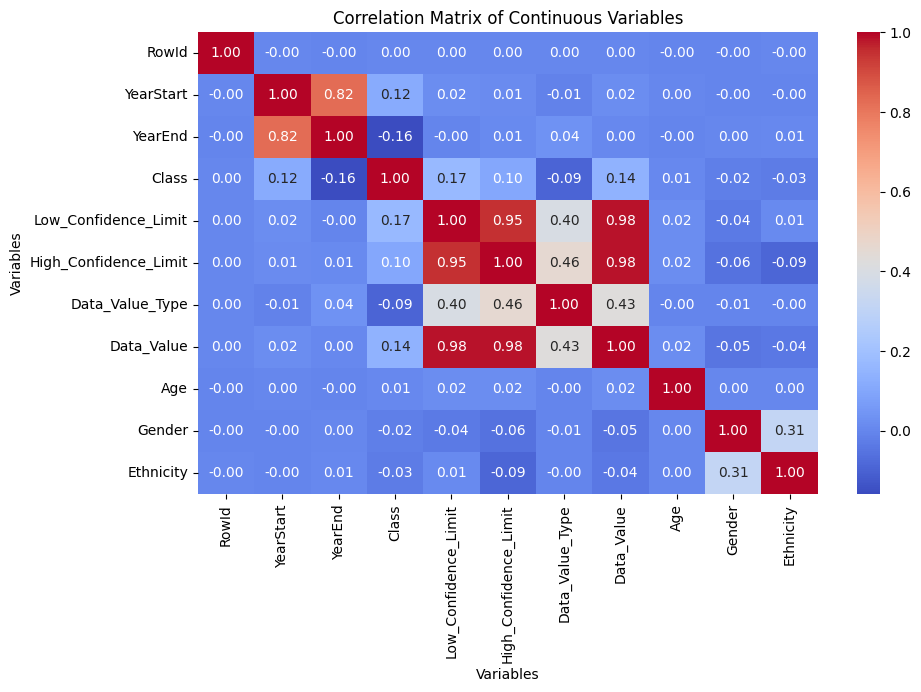

In [ ]:
# Selecting only the continuous variables
continuous_data = data.select_dtypes(include=['float64','int64'])

# Compute the correlation matrix
correlation_matrix = continuous_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

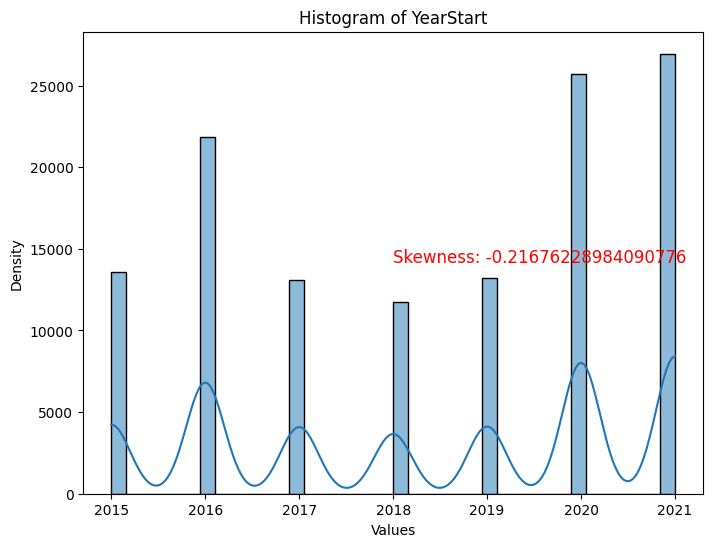

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='YearStart', kde=True)
plt.title('Histogram of YearStart')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['YearStart'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

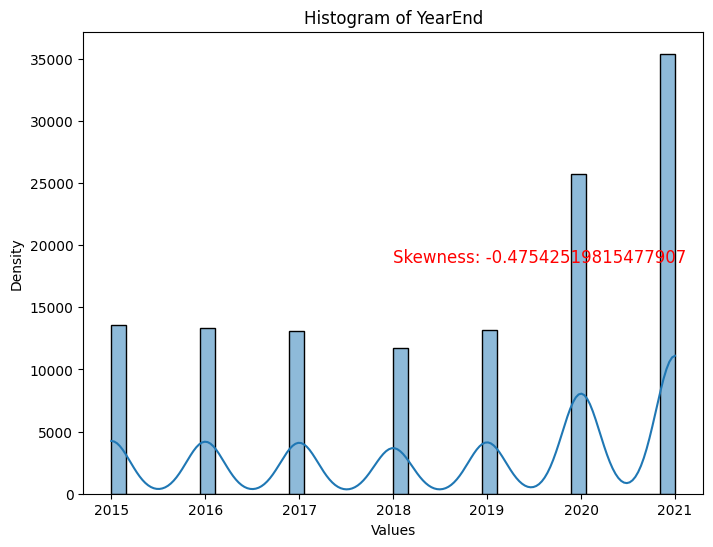

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='YearEnd', kde=True)
plt.title('Histogram of YearEnd')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

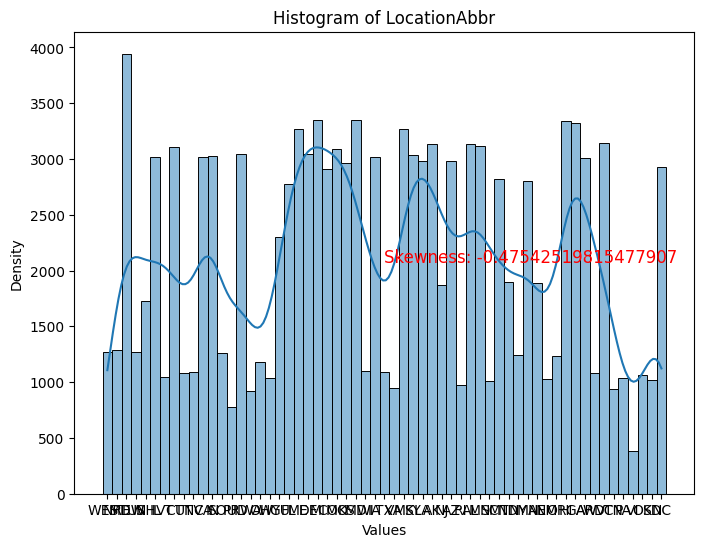

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='LocationAbbr', kde=True)
plt.title('Histogram of LocationAbbr')
plt.xlabel('Values')
plt.ylabel('Density')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)


plt.show()

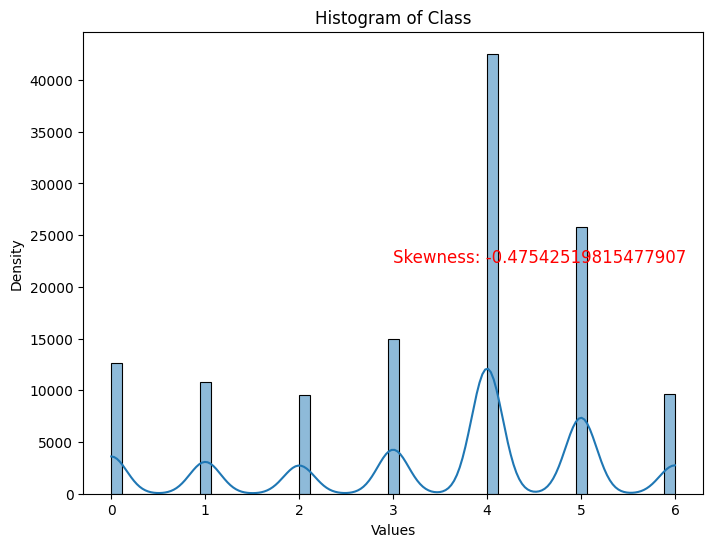

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Class', kde=True)
plt.title('Histogram of Class')
plt.xlabel('Values')
plt.ylabel('Density')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()


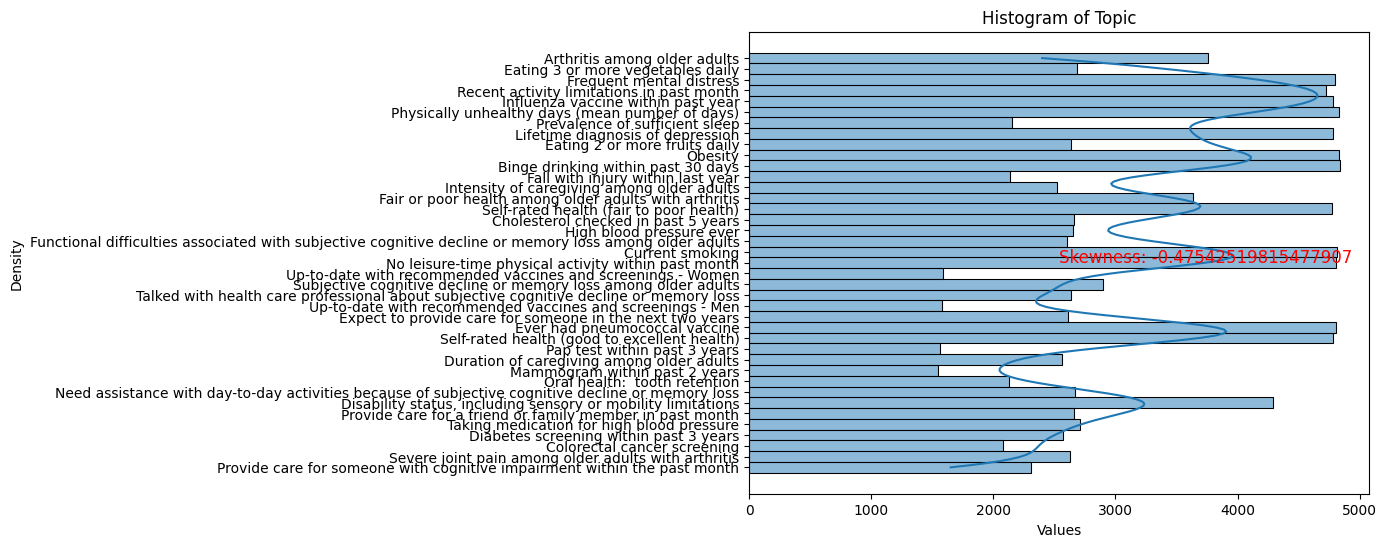

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, y='Topic', kde=True)
plt.title('Histogram of Topic')
plt.xlabel('Values')
plt.ylabel('Density')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

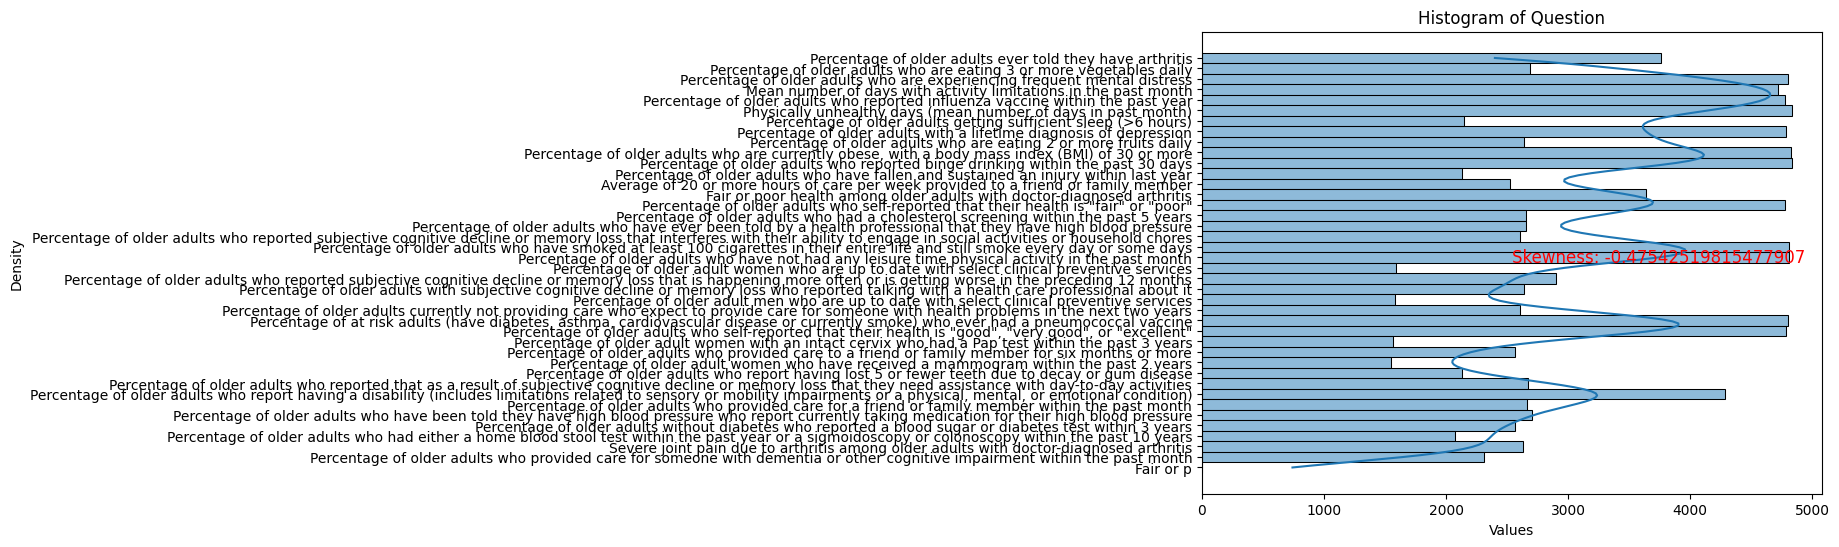

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, y='Question', kde=True)
plt.title('Histogram of Question')
plt.xlabel('Values')
plt.ylabel('Density')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

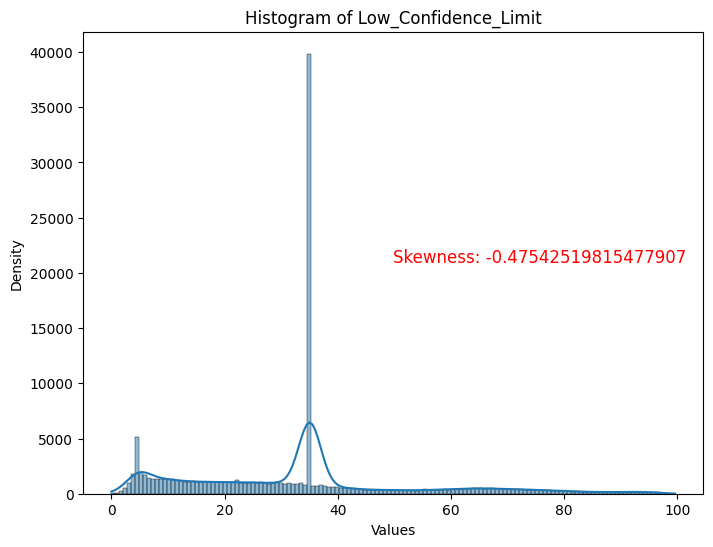

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Low_Confidence_Limit', kde=True)
plt.title('Histogram of Low_Confidence_Limit')
plt.xlabel('Values')
plt.ylabel('Density')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

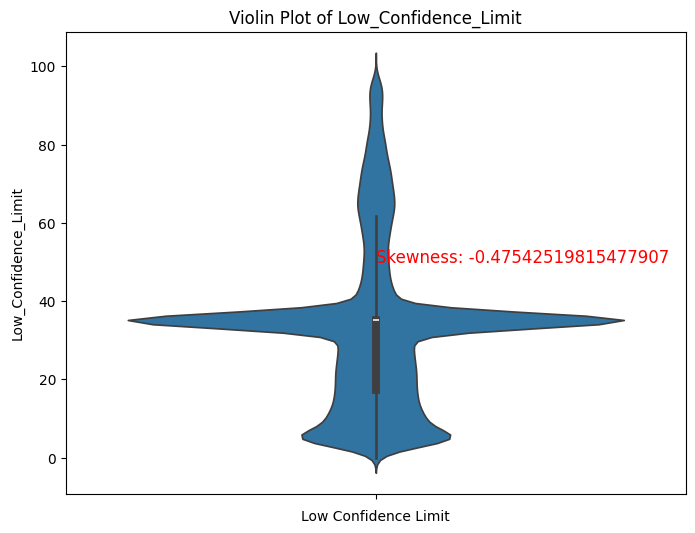

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, y='Low_Confidence_Limit')
plt.title('Violin Plot of Low_Confidence_Limit')
plt.xlabel('Low Confidence Limit')
# Calculate skewness
skewness = data['YearEnd'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()


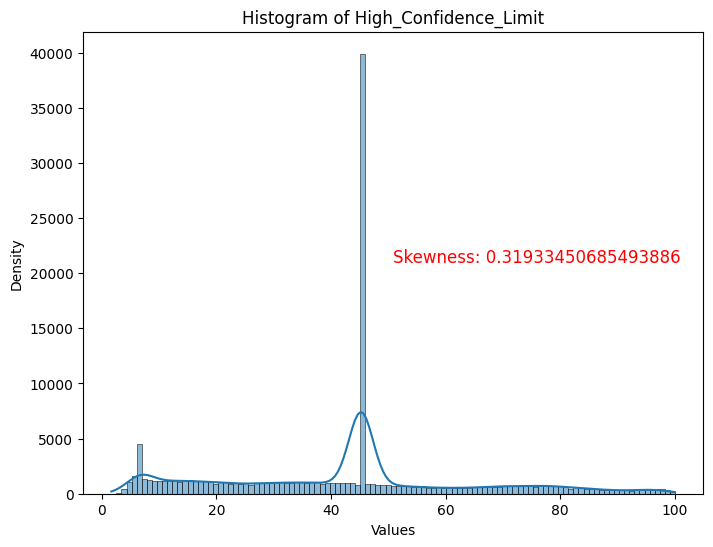

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='High_Confidence_Limit', kde=True)
plt.title('Histogram of High_Confidence_Limit')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['High_Confidence_Limit'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

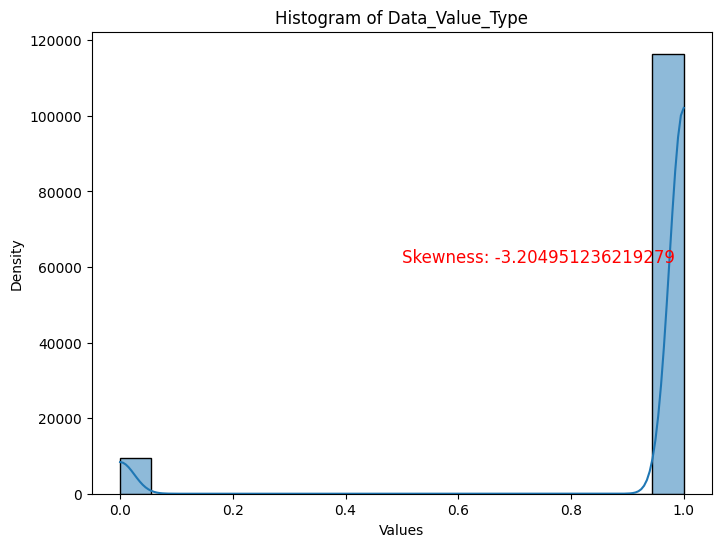

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Data_Value_Type', kde=True)
plt.title('Histogram of Data_Value_Type')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Data_Value_Type'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

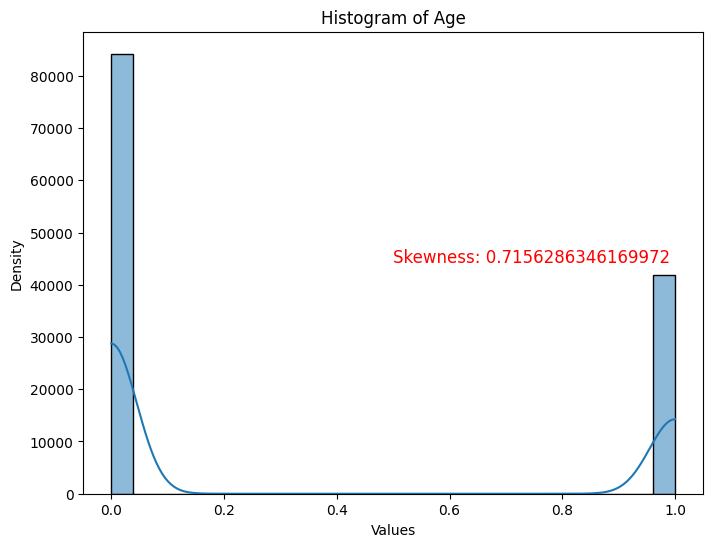

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Age'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

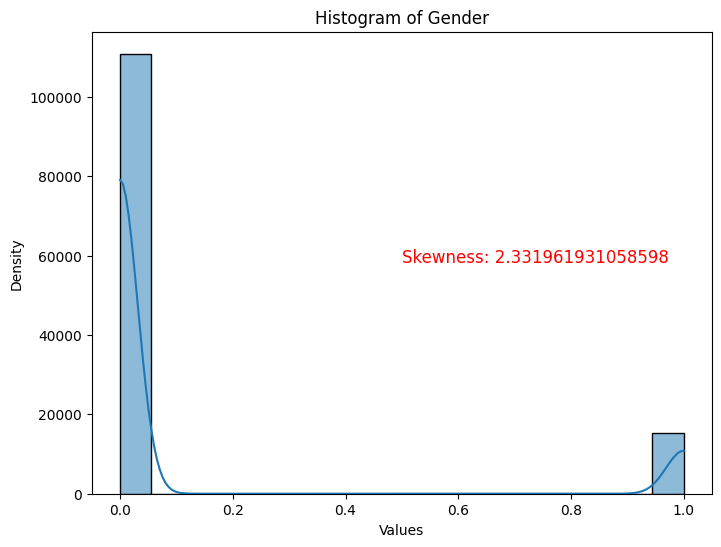

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Gender', kde=True)
plt.title('Histogram of Gender')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Gender'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

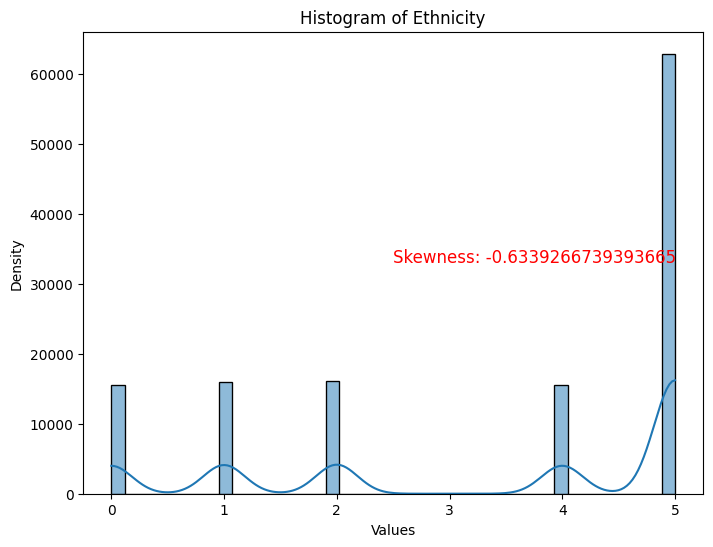

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Ethnicity', kde=True)
plt.title('Histogram of Ethnicity')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Ethnicity'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Geolocation', kde=True)
plt.title('Histogram of Geolocation')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Geolocation'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='	Data_Value', kde=True)
plt.title('Histogram of 	Data_Value')
plt.xlabel('Values')
plt.ylabel('Density')

# Calculate skewness
skewness = data['Data_Value'].skew()

# Annotate skewness value on the ploLifestyle_Choicest
plt.text(0.5, 0.5, f'Skewness: {skewness}', color='red', fontsize=12, transform=plt.gca().transAxes)

plt.show()